# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data set describes SAT results across all US states.
SAT is a standardized test often used for college admission in the US.
The data provided focuses on three main ares:
* participation to the test
* mean result in math
* mean result in verbal

##### 2. Does the data look complete? Are there any obvious issues with the observations?

There doesn't seem to be any missing data, and the number of rows matches the number of US states so we can expect the data set is complete.
There are actually 50 US states plus District of Columbia, and the data set contains 53 rows. If we exclude the first (header) and last (aggregated data for the US), that leaves us with 51 rows, which is in line with our expectation.

##### 3. Create a data dictionary for the dataset.

Column name| Type    | Description               
-----------|---------|---------------------------
State      | string  | State code on 2 chars     
Rate       | integer | Participation rate        
Verbal     | integer | Mean score for verbal test
Math       | integer | Mean score for match test 

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [2]:
# Initialize environment
from __future__ import division

# Load the data
import csv
with open('../assets/sat_scores.csv') as csvfile:
    reader = csv.reader(csvfile)
    data = []
    for row in reader:
        data.append(row)

##### 5. Print the data

In [3]:
print(data)

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [4]:
# Removing the labels
header = data.pop(0)
print(header)

# Removing the aggregated data (All states)
summary = data.pop(-1)
print(summary)

['State', 'Rate', 'Verbal', 'Math']
['All', '45', '506', '514']


##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [5]:
states = [row[0] for row in data]
states[0:3]

['CT', 'NJ', 'MA']

##### 8. Print the types of each column

In [6]:
# Importing regular expressions for a nice display
import re
for i in range(len(data[1])):
    item = data[1][i]
    item_type = str(type(item))
    nice_type = re.sub(r'.*\'(.*)\'.*',r'\1',item_type) 
    print "Column",i,"is of type",nice_type

Column 0 is of type str
Column 1 is of type str
Column 2 is of type str
Column 3 is of type str


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [7]:
# columns 1,2,3 contains integers and therefore their type must be changed
for row in data:
    for i in range(1,4):
        row[i] = int(row[i])

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [8]:
d_rate = {}
d_math = {}
d_verbal = {}
for i in range(len(states)):
    d_rate[states[i]] = data[i][1]
    d_math[states[i]] = data[i][2]
    d_verbal[states[i]] = data[i][3]

##### 11. Create a dictionary with the values for each of the numeric columns

In [9]:
dict = {}
rates = [row[1] for row in data]
verbals = [row[2] for row in data]
maths = [row[3] for row in data]

dict['rate'] = rates
dict['verbal'] = verbals
dict['math'] = maths

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [10]:
def min_max(col):
    print "\tmin is %d" % min(col)
    print "\tmax is %d" % max(col)
    
for key in dict.keys():
    print "Column: %s" % key
    min_max(dict[key])

Column: rate
	min is 4
	max is 82
Column: math
	min is 439
	max is 603
Column: verbal
	min is 482
	max is 593


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [11]:
def std_dev(col):
    mean = sum(col)/len(col)
    std_squared = [(x-mean)**2 for x in col]
    return((sum(std_squared)/len(col))**(1/2))

for key in dict.keys():
    print "Column: %s" % key
    print "\tStandard deviation is %f" % std_dev(dict[key])

Column: rate
	Standard deviation is 27.279239
Column: math
	Standard deviation is 35.929873
Column: verbal
	Standard deviation is 33.031983


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

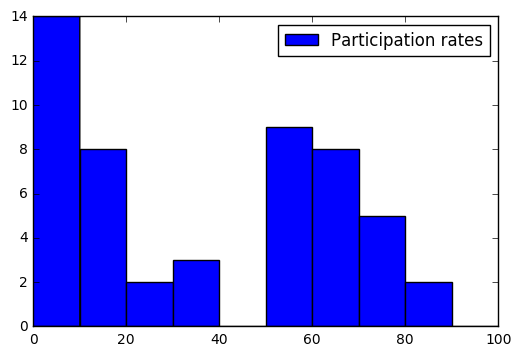

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a plotting function that can be reused for all columns
def distrib(label, values,r=(0,100)):
    plt.hist(values,range=r,label=label)
    plt.legend(loc='best')
    plt.show()

lab = "Participation rates"
distrib(lab,dict['rate'])

##### 15. Plot the Math distribution

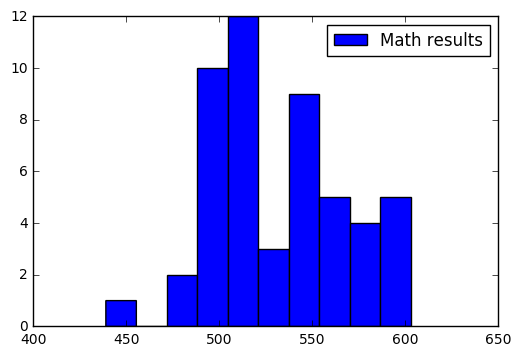

In [13]:
lab = "Math results"
distrib(lab,dict['math'],r=(min(dict['math']),max(dict['math'])))

##### 16. Plot the Verbal distribution

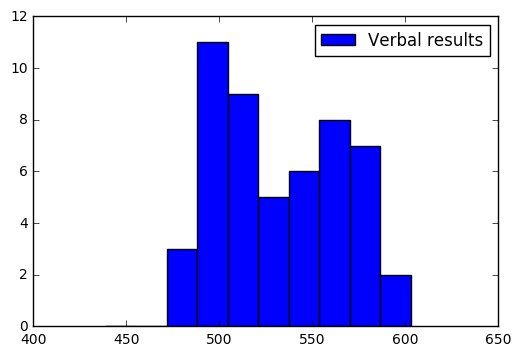

In [14]:
lab = "Verbal results"
# Use the same x scale to be better able to compare math and verbal distributions
distrib(lab,dict['verbal'],r=(min(dict['math']),max(dict['math'])))

##### 17. What is the typical assumption for data distribution?

Many natural phenomena can be represented by normal distributions. Typically we could expect grades or participation rates to follow this distribution too.

##### 18. Does that distribution hold true for our data?

However, looking at the histograms above, rate and verbal are clearly multinodal, hence not following a normal distribution.
Only math approaches what we expect a normal distribution would look like.
To be more accurate, testing normality would require more advanced technics, such a QQ ploting.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

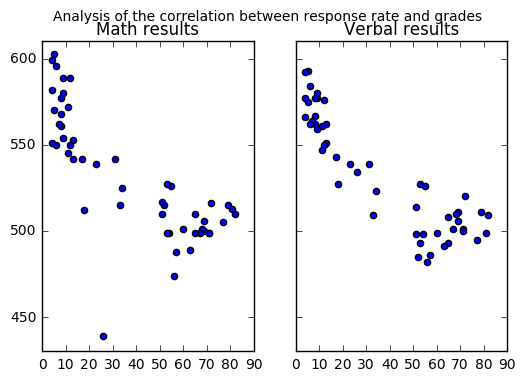

In [20]:
# Analysing if there is a correlation between response rate and grades

fig, axes = plt.subplots(1,2,sharey=True)
ax1 = axes[0]
ax2 = axes[1]
tit = "Analysis of the correlation between response rate and grades"
lab1="Math results"
lab2="Verbal results"
fig.suptitle(tit)
ax1.set_title(lab1)
ax2.set_title(lab2)
ax1.set_ylim((430,610))
ax1.scatter(rates,maths)
ax2.scatter(rates,verbals)
plt.show()

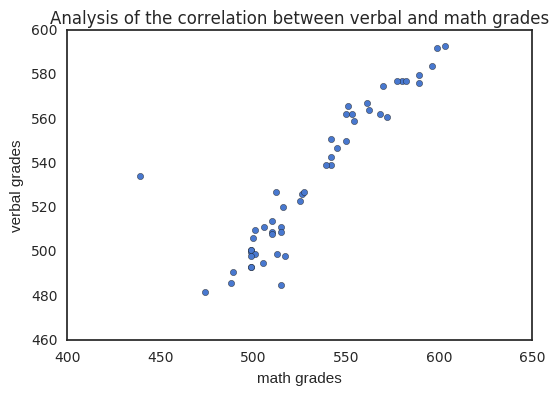

In [390]:
# Analysing if there is a correlation between verbal and math grades
plt.scatter(maths,verbals)
lab = "Analysis of the correlation between verbal and math grades"
plt.title(lab)
plt.ylabel("verbal grades")
plt.xlabel("math grades")
plt.show()

##### 20. Are there any interesting relationships to note?

#### Result 1

Interestingly, there seems to be negative correlation between response rate and results, i.e. the higher the response rate, the lower the average score for a state. This seems to be true both for math and verbal.

_Possible interpretation :_ In states with high response rates, all types of students took part to the SAT. In states with a lower response rate, only the best students took part.

#### Result 2
Also there is a very strong positive correlation between the math and verbal grades, i.e. in every states but one, the math score goes up witht he verbal score, and vice versa.

_Possible interpretation :_ 
One possible interpretation is that in average students are usuly equaly good for both math and verbal. Those scoring high in one will score high in the other as well, and likewise those scoring low in one might score low in the other.
This interpretation would need more data to be supported as their might be other reasons explaining this correlation.

##### 21. Create box plots for each variable. 

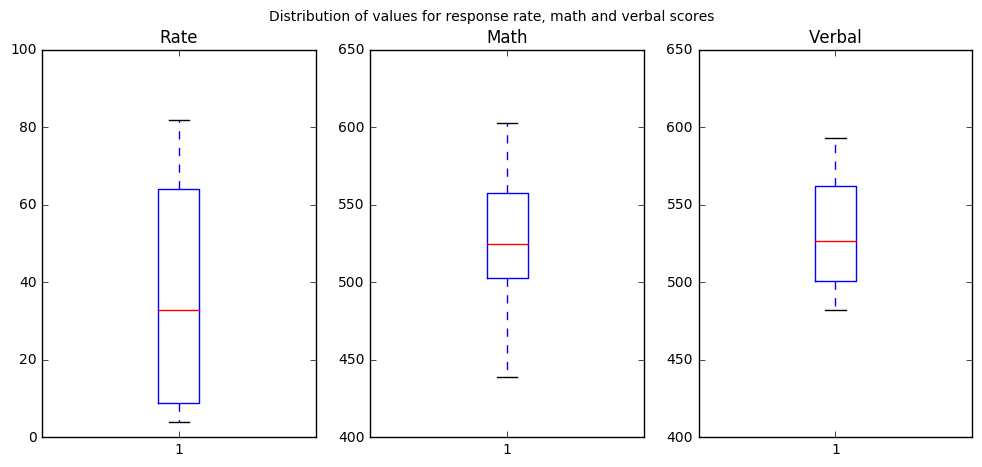

In [21]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
tit = "Distribution of values for response rate, math and verbal scores"
lab1="Rate"
lab2="Math"
lab3="Verbal"
fig.suptitle(tit)
ax1.set_title(lab1)
ax2.set_title(lab2)
ax3.set_title(lab3)
ax1.set_ylim((0,100))
# Aligning y axis for verbal and math to allow comparison
ax2.set_ylim((400,650))
ax3.set_ylim((400,650))
ax1.boxplot(rates)
ax2.boxplot(maths)
ax3.boxplot(verbals)
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

See [Tableau heatmap](../tableau/sat_scores.twb)

#### BONUS: Recreate plots with seaborn

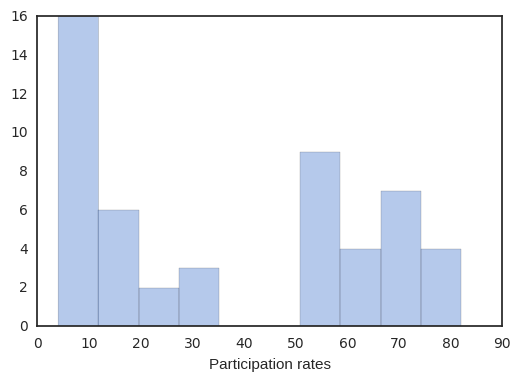

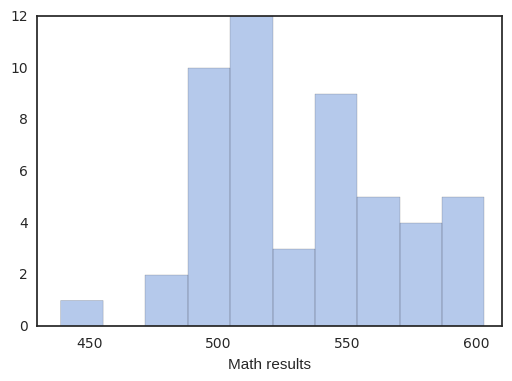

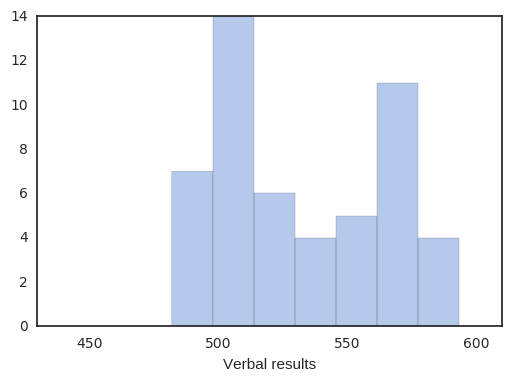

In [392]:
import seaborn as sns

# Import pandas and move data to a DataFrame to simplify manipulation
from pandas import DataFrame
dict['state'] = states
df = DataFrame(dict)

# Plot simple histograms
sns.distplot(df.rate, kde=False, color="b",bins=10,axlabel="Participation rates")
plt.show()

pl1 = sns.distplot(df.math, kde=False, color="b",bins=10,axlabel="Math results")
axes1 = pl1.axes
axes1.set_xlim((430,610))
plt.show()

pl2 = sns.distplot(df.verbal, kde=False, color="b",bins=7,axlabel="Verbal results")
axes2 = pl2.axes
axes2.set_xlim((430,610))
plt.show()

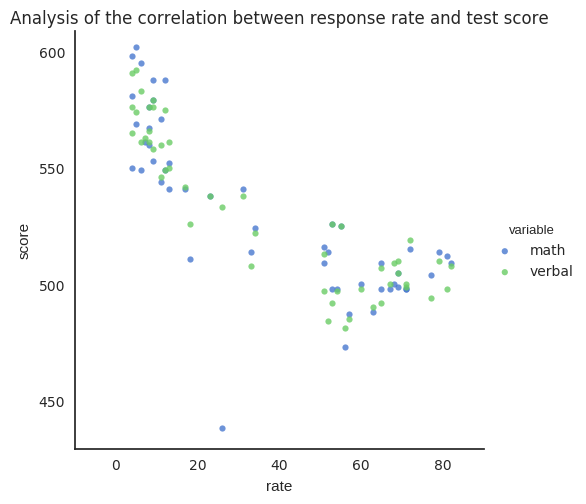

In [393]:
# Melt the DataFrame in order to leverage the "hue" parameter
melted = pd.melt(df,id_vars=["state","rate"],value_vars=["math","verbal"],value_name="score")

# Create a scatterplot for math/verbal versus response rate
lm = sns.lmplot(x="rate",y="score",data=melted,fit_reg=False, hue="variable")
axes = lm.axes
axes[0,0].set_ylim((430,610))
plt.title("Analysis of the correlation between response rate and test score")
plt.show()

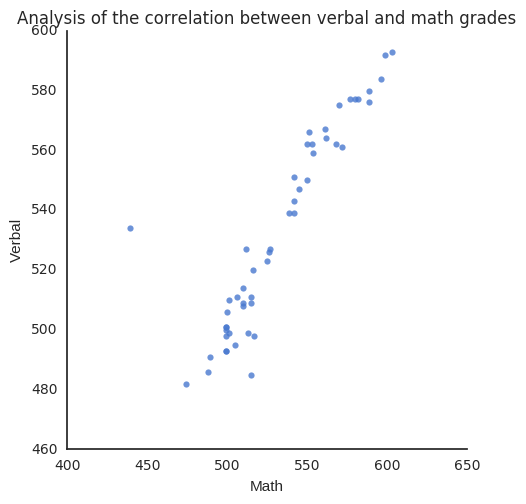

In [394]:
# Create a scatterplot for verbal vs math
sns.lmplot(x="math",y="verbal",data=df,fit_reg=False)
plt.title("Analysis of the correlation between verbal and math grades")
plt.xlabel("Math")
plt.ylabel("Verbal")
plt.show()

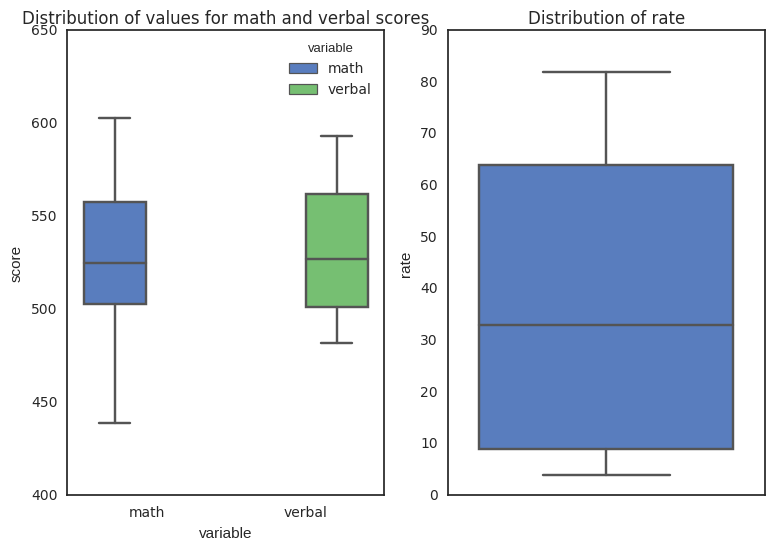

In [395]:
# Create boxplots

f, axes = plt.subplots(1, 2, figsize=(9, 6))

plot1 = sns.boxplot(x="variable",y="score",data=melted,hue="variable",ax=axes[0])
plot1.set_title("Distribution of values for math and verbal scores")

plot2 = sns.boxplot(y="rate",data=df,ax=axes[1])
plot2.set_title("Distribution of rate")

plt.show()
